<a href="https://colab.research.google.com/github/Inhusa/AI-class/blob/main/5%20week/DL_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MNIST 딥러닝 실습 예제

### data load  및 data 구조 확인

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn import datasets

digit = datasets.load_digits()
print(digit.data,digit.target)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] [0 1 2 ... 8 9 8]


In [15]:
len(digit.images)

1797

In [16]:
import numpy as np
np1 = digit.data
np2 = digit.images.reshape((len(digit.images),-1))
np.array_equal(np1,np2)


True

이미지데이터를 1차원 배열로 reshape한 것이 data값임을 한번 확인 해봤다. 같으므로 그냥 data값을 활용하도록 하겠다.

#### OnehotEncoding 및 data분할

In [19]:
from tensorflow.keras.utils import to_categorical
X = digit.data
y= to_categorical(digit.target)
print(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


#### 신경망 모델 객체 생성 / 구조 설정 / 컴파일

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(64,)))
model.add(Dense(32, activation='relu', input_shape=(64,)))
model.add(Dense(32, activation='relu', input_shape=(64,)))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,626 (29.79 KB)

 Trainable params: 7,626 (29.79 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9959 - loss: 0.0353 - val_accuracy: 0.9375 - val_loss: 0.1777
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9974 - loss: 0.0270 - val_accuracy: 0.9375 - val_loss: 0.1814
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9992 - loss: 0.0309 - val_accuracy: 0.9444 - val_loss: 0.1643
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9984 - loss: 0.0273 - val_accuracy: 0.9444 - val_loss: 0.1649
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9974 - loss: 0.0192 - val_accuracy: 0.9444 - val_loss: 0.1665
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9990 - loss: 0.0145 - val_accuracy: 0.9479 - val_loss: 0.1605
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9997 - loss: 0.0143 - val_accuracy: 0.9375 - val_loss: 0.1773
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9996 - loss: 0.0118 - val_accuracy: 0.9444 - val_los

#### 시각화  

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


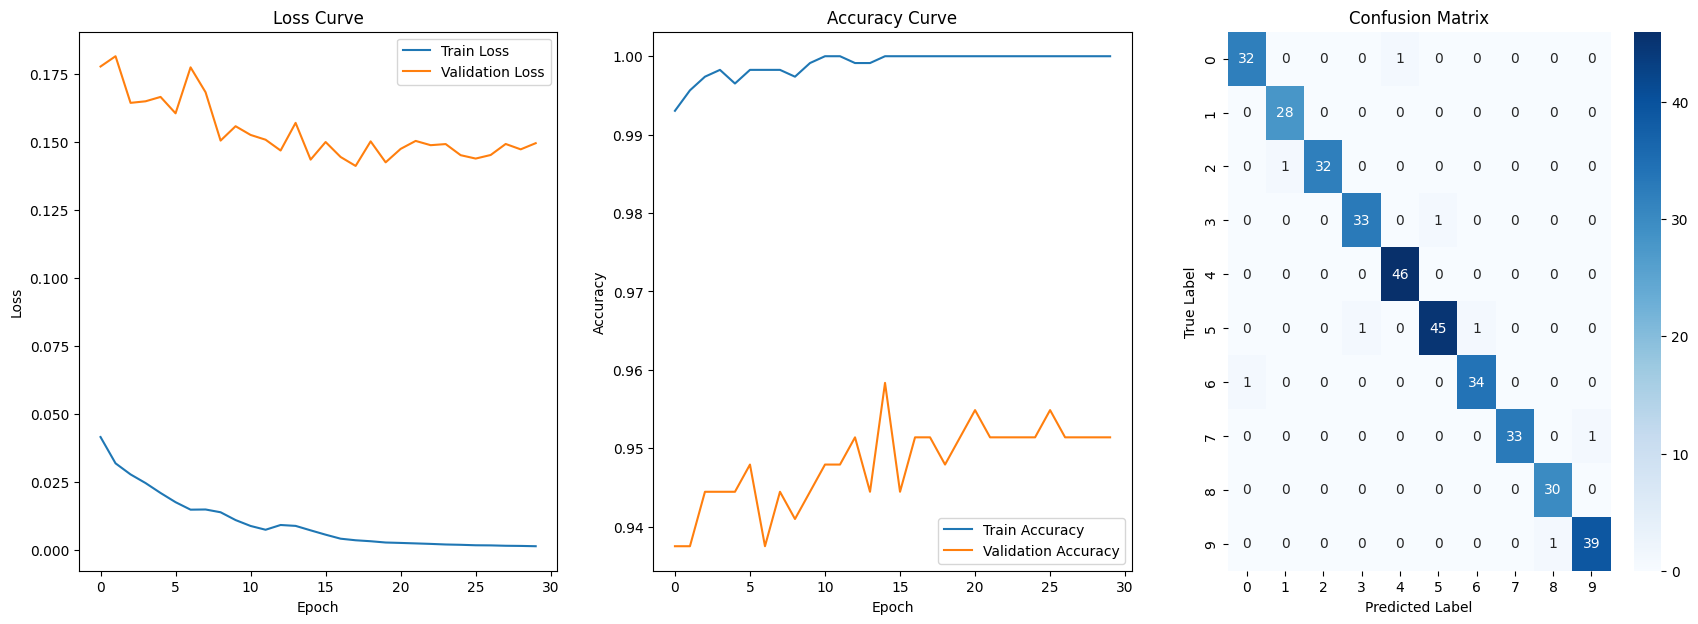

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# 기존 학습 그래프
plt.figure(figsize=(21, 7))

#  손실(Loss) 그래프
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

# 정확도(Accuracy) 그래프
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()

# 혼동 행렬(Confusion Matrix) 시각화
y_pred = model.predict(X_test)  # 테스트 데이터 예측
y_pred_classes = np.argmax(y_pred, axis=1)  # 예측된 클래스
y_true = np.argmax(y_test, axis=1)  # 실제 클래스

conf_matrix = confusion_matrix(y_true, y_pred_classes)  # 혼동 행렬 계산

plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.show()